# ¡Hola, Julio!  


Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> Hecho! <a class="tocSkip"></a>
</div>

# Introduccion

Nosotros, el equipo de Interconnect, estamos trabajando en una tarea emocionante: anticipar cuándo nuestros valiosos usuarios están pensando en decir adiós. Queremos estar un paso adelante y ofrecerles soluciones antes de que tomen esa decisión. Para lograrlo, estamos aprovechando los datos que tenemos sobre nuestros apreciados clientes, como sus preferencias de planes y detalles de sus contratos.

Vamos a hacer un Analisis Exploratorio de Datos (EDA). Veremos los datos y todo lo que tienen, el tipo de datos, anomalias, tendencias, etc. Luego empezaremos a tomar decisiones sobre que hacer para trabajar con estos datos y poder sacar conclusiones a traves de lo que vayamos visualizando a traves de graficos y descripciones de datos. Luego haremos unas proyecciones generales sobre los dataframe cuando esten todos unidos. Finalmente podremos usar herramientas de preprocesamiento como el OHE para ayudarnos con aquellas columnas o entradas que sean categoricas, convirtiendolas a numeros facilitandonos el funcionamiento de los modelos de machine learning que vayamos a usar. Igualmente habran instrucciones de lo que se hace paso a paso en cada celda de bloque seguido de un signo numeral ('#').

## Importacion de librerias

In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [96]:
#Importamos librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from scipy import stats as st
import math
import re

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import catboost
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.utils import resample

In [7]:
#Guardamos los dataframe en variables
contract_df = pd.read_csv('contract.csv')
personal_df = pd.read_csv('personal.csv')
internet_df = pd.read_csv('internet.csv')
phone_df = pd.read_csv('phone.csv')

## Exploracion de datos


### Contract Dataframe

In [8]:
#Imprimimos informacion general sobre el dataframe
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [9]:
#Aplicamos una descripcion general a los datos
contract_df.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [10]:
#Veamos cuantos valores ausentes tiene el dataframe
contract_df.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [11]:
#Veamos cuantos duplicados tiene el dataframe
contract_df.duplicated().sum()

0

In [12]:
#Imprimimos una muestra
contract_df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [13]:
#Función para renombrar las columnas
def renombrar_columnas(nombre_columna):
    #Utiliza expresiones regulares para agregar guiones bajos
    return ''.join(['_' + letra.lower() if letra.isupper() else letra for letra in nombre_columna]).lstrip('_')

#Usar .rename() para renombrar las columnas
contract_df.rename(columns=renombrar_columnas, inplace=True)
contract_df.rename(columns={'customer_i_d': 'customer_id'}, inplace=True)

#Mostrar el DataFrame actualizado
contract_df

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [14]:
#Veamos cuantos cargos totales distintos hay
contract_df.total_charges.nunique()

6531

In [15]:
#Veamos cuantos cargos totales no son numericos y los guardamos en una variable llamada 'non_numerical_entries_total_charges'
non_numerical_entries_total_charges = contract_df[contract_df['total_charges'].apply(lambda x: not any(c.isdigit() for c in str(x)))]

In [16]:
#Mostramos
non_numerical_entries_total_charges

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [17]:
#Remplazamos los strings que sean vacios con NaN
contract_df['total_charges'] = pd.to_numeric(contract_df['total_charges'], errors='coerce')

#Convertimos a float64
contract_df['total_charges'] = contract_df['total_charges'].astype('float64')

In [18]:
#Aplicamos un describe, pues no pudimos ver los datos ya que no estaban en formato numerico (flotat64, int)
contract_df.total_charges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: total_charges, dtype: float64

In [19]:
#Visualizamos de nuevo cuales son los NaN, deberian ser los mismo que los que guardamos en la variable non_numerical_entries_total_charges
contract_df[contract_df['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


In [20]:
#Veamos cuantos valores unicos tiene 'PaperlessBilling'
contract_df.paperless_billing.nunique()

2

In [21]:
#Cambiamos el 'Yes' por un 1 y 'No' por '0'
contract_df['paperless_billing'] = contract_df['paperless_billing'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))
contract_df.paperless_billing.value_counts(normalize=True)

1    0.592219
0    0.407781
Name: paperless_billing, dtype: float64

In [22]:
#Convirtamos la serie 'BeginDate' a formato datetime
contract_df['begin_date'] = pd.to_datetime(contract_df['begin_date'])

In [23]:
#Veamos como se reparten los datos
contract_df['end_date'].value_counts(normalize=True)

No                     0.734630
2019-11-01 00:00:00    0.068863
2019-12-01 00:00:00    0.066165
2020-01-01 00:00:00    0.065313
2019-10-01 00:00:00    0.065029
Name: end_date, dtype: float64

In [24]:
#Veamos cuantos valores tiene la columna 'EndDate'
contract_df['end_date'].nunique()

5

In [25]:
#Creemos una columna llamada 'year' que contenga el año en el que se inicio
contract_df['begin_year'] = contract_df['begin_date'].dt.year

In [26]:
#Veamos los valores unicos que hay
contract_df['begin_year'].unique()

array([2020, 2017, 2019, 2016, 2018, 2014, 2015, 2013], dtype=int64)

In [27]:
#Veamos como se reparten los años
contract_df['begin_year'].value_counts(normalize=True)

2019    0.277865
2014    0.190828
2018    0.146244
2015    0.120971
2017    0.119977
2016    0.108335
2020    0.034644
2013    0.001136
Name: begin_year, dtype: float64

In [28]:
#Convertimos los datos de 'end_date' a formato datetime
contract_df['end_date'] = pd.to_datetime(contract_df['end_date'], errors= 'coerce')

In [29]:
#Hacemos una columna 'years_with_plan' que nos devuelva la cantidad de años que tiene el cliente con el plan contratado
contract_df['years_with_plan'] = (contract_df['end_date'].dt.year) - (contract_df['begin_year'])

In [30]:
#Llenamos los valores ausentes en 'end_date' o 'NaT' con 'No'
contract_df['end_date'] = contract_df['end_date'].fillna('No')

In [31]:
#Llenamos los valores ausentes en 'years_with_plan' a 0
contract_df['years_with_plan'] = contract_df['years_with_plan'].fillna(0)

In [32]:
#Veamos la mediana y media de total_charges
contract_df.total_charges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: total_charges, dtype: float64

In [33]:
#Solucionemos aquellos valores ausentes con la mediana, puesto que hay gran diferencia entre la media y mediana (puede desviar los datos de la realidad al usar media)
median_total_charges_years_with_plan = contract_df.groupby('years_with_plan')['total_charges'].median()

def fill_na_total_charges(row):
    row_total_charges = row['total_charges']
    row_years_with_plan = row['years_with_plan']
    if pd.isna(row_total_charges):
        return median_total_charges_years_with_plan[row_years_with_plan]
    else:
        return row_total_charges

In [34]:
#Revisemos si funciona nuestra funcion
fill_na_total_charges(contract_df.loc[488])

1330.1

In [35]:
#Apliquemos la funcion e imprimamos una muestra
contract_df['total_charges'] = contract_df.apply(fill_na_total_charges, axis=1)

contract_df.loc[488]

customer_id                         4472-LVYGI
begin_date                 2020-02-01 00:00:00
end_date                                    No
type                                  Two year
paperless_billing                            1
payment_method       Bank transfer (automatic)
monthly_charges                          52.55
total_charges                           1330.1
begin_year                                2020
years_with_plan                            0.0
Name: 488, dtype: object

In [36]:
#Veamos si hay valores ausentes
contract_df.isna().sum().sum()

0

In [37]:
#Veamos como se distribuyen las clases de years_with_plan
contract_df['years_with_plan'].value_counts(normalize=True)

0.0    0.837569
1.0    0.070709
2.0    0.032089
3.0    0.022292
4.0    0.019026
5.0    0.013205
6.0    0.005111
Name: years_with_plan, dtype: float64

In [38]:
#Saquemos el mes de cada inicio de cada contrato para futuros analisis
contract_df['month'] = contract_df['begin_date'].dt.month

In [39]:
#Veamos como se distribuyen las clases
contract_df.month.value_counts(normalize=True)

2     0.114156
1     0.088457
9     0.088457
11    0.088173
12    0.085759
10    0.085333
3     0.083771
8     0.075536
6     0.074116
7     0.073548
4     0.072554
5     0.070141
Name: month, dtype: float64

In [40]:
#Veamos como se distribuyen las clases de como reciben su factura los clientes (digital, o fisica)
contract_df.paperless_billing.value_counts(normalize=True)

1    0.592219
0    0.407781
Name: paperless_billing, dtype: float64

In [41]:
#Creamos una funcion para hacer diagramas de caja y bigotes, tomando como parametro el dataframe en uso
def plot_boxplot(dataframe):
    #Filtrar columnas numéricas
    numeric_columns = dataframe.select_dtypes(include=['int64', 'float64'])
    
    #Crear el boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=numeric_columns)
    plt.xticks(rotation=45)
    plt.title('Boxplot de las Columnas Numéricas')
    plt.xlabel('Columnas')
    plt.ylabel('Valores')
    plt.show()

In [42]:
#Creemos una funcion que tome como parametros el dataframe, columna en el eje x, columna en el eje y, tipo de grafico
def generar_grafico(dataframe, x_columna, y_columna, tipo):
    """
    Genera un gráfico de barras o un gráfico de dispersión según el tipo especificado.

    :param dataframe: El DataFrame que contiene los datos.
    :param x_columna: El nombre de la columna para el eje X.
    :param y_columna: El nombre de la columna para el eje Y.
    :param tipo: El tipo de gráfico ('barras' o 'dispersion').
    """
    
    if x_columna not in dataframe.columns or y_columna not in dataframe.columns:
        print("Una o ambas columnas especificadas no existen en el DataFrame.")
        return
    
    if tipo == 'bar':
        plt.figure(figsize=(8, 6))
        plt.bar(dataframe[x_columna], dataframe[y_columna])
        plt.xlabel(x_columna)
        plt.ylabel(y_columna)
        plt.title(f'Gráfico de Barras: {x_columna} vs {y_columna}')
        plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
        plt.show()
    elif tipo == 'scarse':
        plt.figure(figsize=(8, 6))
        plt.scatter(dataframe[x_columna], dataframe[y_columna])
        plt.xlabel(x_columna)
        plt.ylabel(y_columna)
        plt.title(f'Gráfico de Dispersión: {x_columna} vs {y_columna}')
        plt.show()
    else:
        print("Tipo de gráfico no válido. Use 'bar' o 'scarse'.")

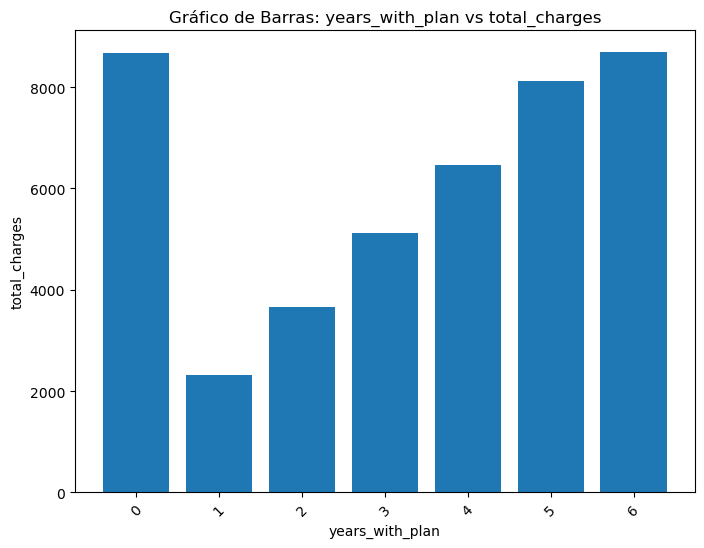

In [43]:
#Graficamos la cantidad de gastos totales por cantidad de años con el plan en un grafico de barras
generar_grafico(contract_df, 'years_with_plan', 'total_charges', 'bar')

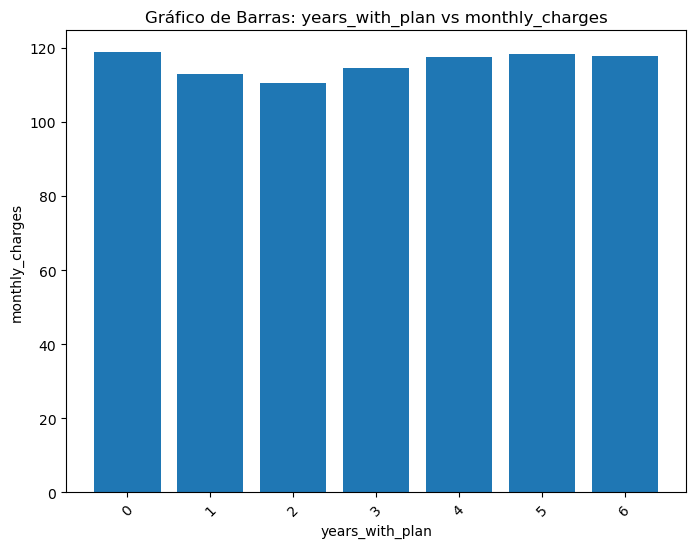

In [44]:
#Graficamos los gastos mensuales por la cantidad de años con el plan en un grafico de barras
generar_grafico(contract_df, 'years_with_plan', 'monthly_charges', 'bar')

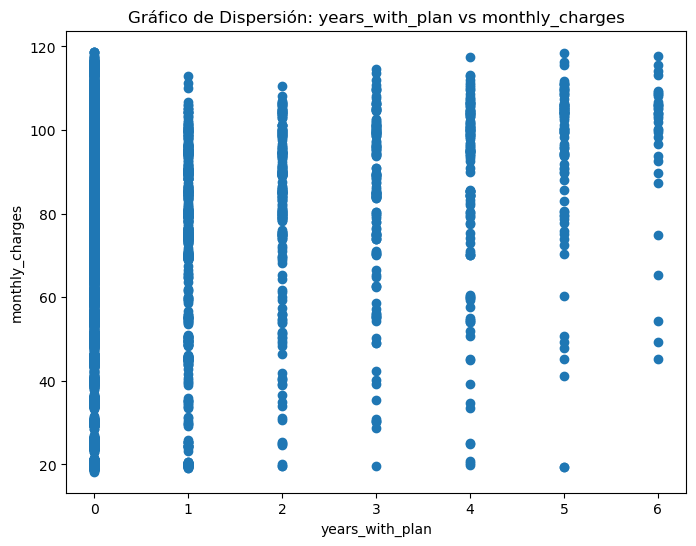

In [45]:
#Graficamos la cantidad de gastos mensuales por cantidad de años en un grafico de dispersion
generar_grafico(contract_df, 'years_with_plan', 'monthly_charges', 'scarse')

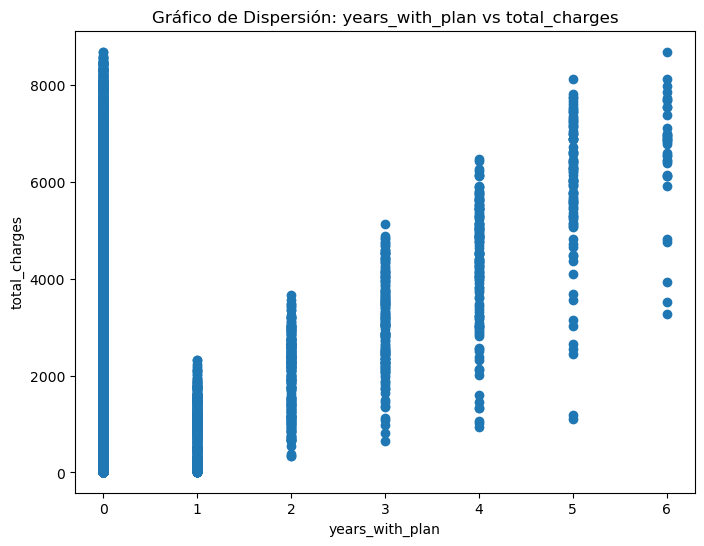

In [46]:
#Graficamos los gastos totales por la cantidad de años en un grafico de dispersion
generar_grafico(contract_df, 'years_with_plan', 'total_charges', 'scarse')

In [ ]:
#Graficamos como van los gastos mensuales por mes en un grafico de barras
generar_grafico(contract_df, 'month', 'monthly_charges', 'bar')

In [ ]:
#Graficamos como van los gastos mensuales por mes en un grafico de dispersion
generar_grafico(contract_df, 'month', 'monthly_charges', 'scarse')

In [ ]:
#Graficamos con la funcion un diagrama de caja y bigotes
plot_boxplot(contract_df)

### Personal Dataframe


In [ ]:
#Imprimimos informacion general sobre los datos
personal_df.info()

In [ ]:
#Revisamos como van los datos
personal_df.describe()

In [ ]:
#Veamos si hay valores ausentes
personal_df.isna().sum()

In [ ]:
#Chequeamos por valores duplicados
personal_df.duplicated().sum()

In [ ]:
#Imprimimos una muestra
personal_df

In [ ]:
#Usamos la funcion renombrar_columnas
personal_df.rename(columns=renombrar_columnas, inplace=True)
personal_df.rename(columns={'customer_i_d': 'customer_id'}, inplace=True)

#Mostramos
personal_df

In [ ]:
#Vemos las columnas Partner y Dependents que valores tienen, si son solo "Yes" o "No", podemos reemplazar con binarios
personal_df.partner.unique()

In [ ]:
personal_df.dependents.unique()

In [ ]:
#Cambiamos aquellas columnas que sean binarias a 1 o 0 para facilitar el proceso de ML despues
personal_df.partner = personal_df.partner.apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))
personal_df.dependents = personal_df.dependents.apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

In [ ]:
#Veamos como se distribuyen las clases
personal_df.partner.value_counts(normalize=True)

In [ ]:
#Veamos como se distribuyen las clases
personal_df.dependents.value_counts(normalize=True)

### Internet Dataframe

In [ ]:
#Vemos informacion general sobre los datos
internet_df.info()

In [ ]:
#Veamos una descripcion de los datos
internet_df.describe()

In [ ]:
#Cambiemos los nombres de las columnas a minusculas y underscores(_)
internet_df.rename(columns=renombrar_columnas, inplace=True)
internet_df.rename(columns= {'customer_i_d' : 'customer_id', 'streaming_t_v' : 'streaming_tv'}, inplace=True)

internet_df.columns

In [ ]:
#Vamos a reemplazar los valores que sean binarios a 1 o 0
internet_df.online_security = internet_df.online_security.apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x)).astype('float64')
internet_df.online_backup = internet_df.online_backup.apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x)).astype('float64')
internet_df.device_protection = internet_df.device_protection.apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x)).astype('float64')
internet_df.tech_support = internet_df.tech_support.apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x)).astype('float64')
internet_df.streaming_tv = internet_df.streaming_tv.apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x)).astype('float64')
internet_df.streaming_movies = internet_df.streaming_movies.apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x)).astype('float64')

#Imprimamos una muestra
internet_df

In [ ]:
#Chequeamos para valores ausentes
internet_df.isna().sum()

In [ ]:
#Revisemos si hay duplicados
internet_df.duplicated().sum()

### Phone Dataframe

In [ ]:
#Mostremos informacion general sobre los datos
phone_df.info()

In [ ]:
#Veamos como van los datos
phone_df.describe()

In [ ]:
#Renombramos las columnas a minusculas y underscores(_)
phone_df.rename(columns=renombrar_columnas, inplace=True)
phone_df.rename(columns= {'customer_i_d' : 'customer_id'}, inplace=True)

In [ ]:
#Reemplazamos los valores binarios por 1 o 0
phone_df.multiple_lines = phone_df.multiple_lines.apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

In [ ]:
#Revisemos los valores ausentes
phone_df.isna().sum()

In [ ]:
#Veamos si hay duplicados
phone_df.duplicated().sum()

### Conclusiones despues de tratar los dataframes

Podemos ver que los dataframes en si no eran tan problematicos. Muchos no comparten los mismos datos y hay diferentes clientes en mucho de los conjuntos de datos. Cambiamos los nombres de las columnas a "snake_case" para que sea mas simple de acceder a ellos, y tambien simplificamos el proceso de cambiar aquellos valores binarios ('yes' o 'no') a numericos, es decir, 1 o 0. Esto nos ayudara a no usar espacio computacional en el futuro, es decir, al encodificar con herramientas como OHE, OrdinalEncoder, etc., pues no tendremos que usarlo para esas columnas.

## Juntemos los dataframes, para hacer graficos, hipotesis, etc.


In [ ]:
#Combinar contract_df y personal_df en la columna customer_id
merged_df = pd.merge(contract_df, personal_df, on='customer_id', how='left')

#Combinar internet_df con el DataFrame fusionado
merged_df = pd.merge(merged_df, internet_df, on='customer_id', how='left')

#Combinar phone_df con el DataFrame fusionado
merged_df = pd.merge(merged_df, phone_df, on='customer_id', how='left')

merged_df

In [ ]:
#Veamos informacion general del dataframe
merged_df.info()

In [ ]:
#Veamos una descripcion de datos
merged_df.describe()

In [ ]:
#Veamos cuantos NaN tenemos ahora
merged_df.isna().sum()

In [ ]:
#Llenamos aquellos datos de clientes que no tengan registro de esos servicios con una categoria especial
merged_df.fillna('Not Registered', inplace=True)

merged_df

In [ ]:
#Veamos cuantos NaN tenemos
merged_df.isna().sum()

In [ ]:
#Grafiquemos un boxplot con el dataframe nuevo
plot_boxplot(merged_df)

In [ ]:
#Creemos una columna que nos indique si un cliente ha abandonado el plan que se ha ofrecido
merged_df['left_plan'] = merged_df['end_date'].apply(lambda x: 0 if x == 'No' else 1)

In [ ]:
#Veamos cuantos clientes en relacion a nuestros datos han abandonado el plan
merged_df.left_plan.value_counts(normalize=True)

In [ ]:
#Crear un gráfico de barras
plt.bar(merged_df['left_plan'].unique(), merged_df['left_plan'].value_counts(), tick_label=['0', '1'])
plt.xlabel('Valor')
plt.ylabel('Conteo')
plt.title('Gráfico de Barras de la Columna "left_plan"')
plt.show()

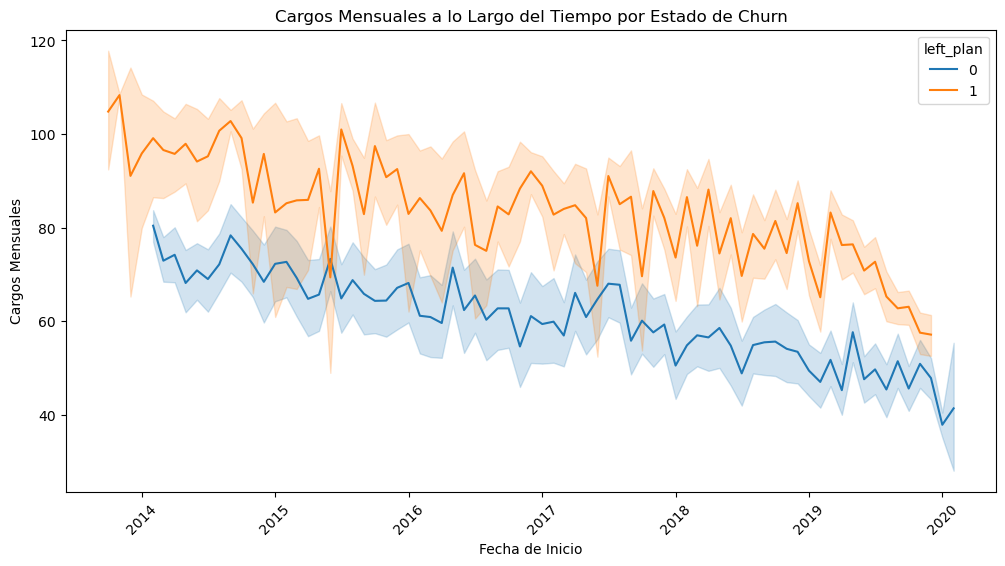

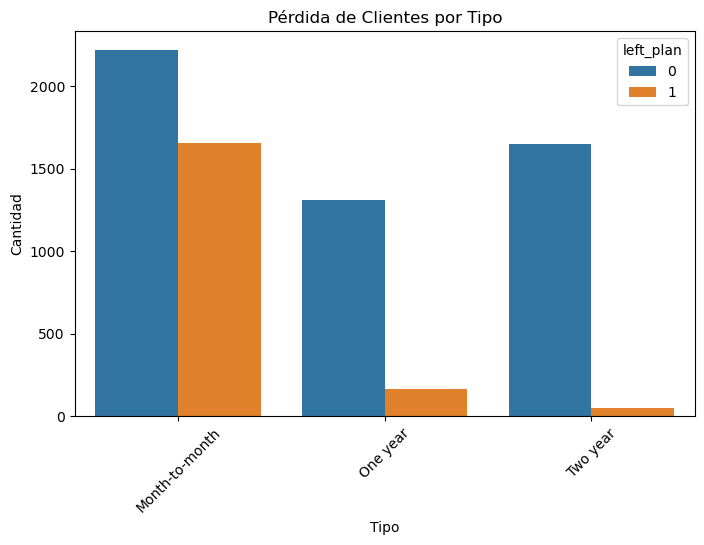

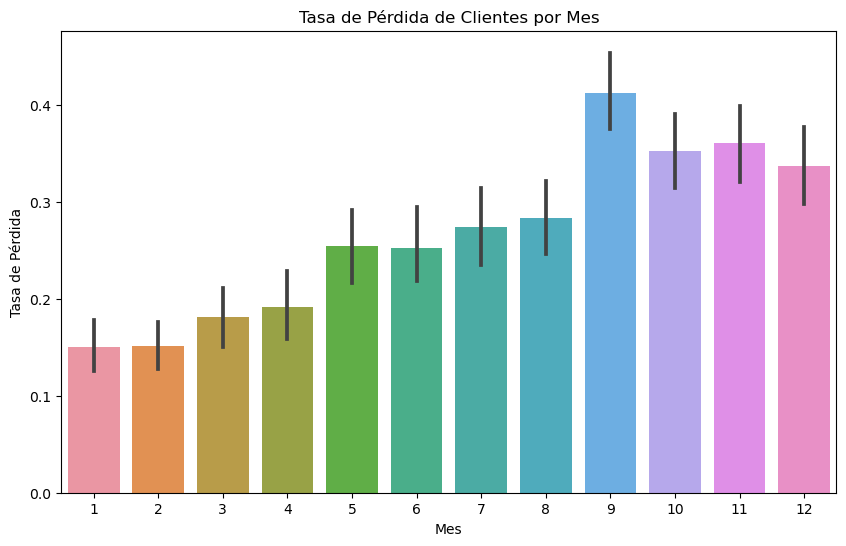

In [85]:
#Visualizamos tendencias a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='begin_date', y='monthly_charges', hue='left_plan', data=merged_df)
plt.title('Cargos Mensuales a lo Largo del Tiempo por Estado de Churn')
plt.xlabel('Fecha de Inicio')
plt.ylabel('Cargos Mensuales')
plt.xticks(rotation=45)
plt.show()

#Visualizamos la pérdida de clientes por tipo
plt.figure(figsize=(8, 5))
sns.countplot(x='type', hue='left_plan', data=merged_df)
plt.title('Pérdida de Clientes por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

#Visualizamos la estacionalidad
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='left_plan', data=merged_df, estimator=lambda x: sum(x) / len(x))
plt.title('Tasa de Pérdida de Clientes por Mes')
plt.xlabel('Mes')
plt.ylabel('Tasa de Pérdida')
plt.show()

In [88]:
# Aplicamos el OneHotEncoder
# Seleccionamos las columnas categóricas que deseamos codificar
columns_to_encode = ['type', 'gender', 'internet_service', 'payment_method']

# Creamos una instancia de OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' para el dummy trap

# Ajustamos el codificador a los datos de entrenamiento
encoder.fit(merged_df[columns_to_encode])

# Transformamos las columnas categóricas en codificación one-hot
encoded_columns = encoder.transform(merged_df[columns_to_encode])

# Obtenemos las categorías de las características codificadas
encoded_categories = encoder.get_feature_names_out(input_features=columns_to_encode)

# Convertimos las columnas codificadas en un DataFrame y asignamos nombres a las columnas
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_categories)

# Combinamos el DataFrame codificado con el DataFrame original
merged_df_encoded = pd.concat([merged_df, encoded_df], axis=1)

# Eliminamos las columnas originales categóricas
merged_df_encoded = merged_df_encoded.drop(columns=columns_to_encode)

merged_df_encoded

C:\Users\nicar\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,customer_id,begin_date,end_date,paperless_billing,monthly_charges,total_charges,begin_year,years_with_plan,month,senior_citizen,...,multiple_lines,left_plan,type_One year,type_Two year,gender_Male,internet_service_Fiber optic,internet_service_Not Registered,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,7590-VHVEG,2020-01-01,No,1,29.85,29.85,2020,0.0,1,0,...,Not Registered,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,2017-04-01,No,0,56.95,1889.50,2017,0.0,4,0,...,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,1,53.85,108.15,2019,0.0,10,0,...,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,2016-05-01,No,0,42.30,1840.75,2016,0.0,5,0,...,Not Registered,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,1,70.70,151.65,2019,0.0,9,0,...,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,1,84.80,1990.50,2018,0.0,2,0,...,1.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,2234-XADUH,2014-02-01,No,1,103.20,7362.90,2014,0.0,2,0,...,1.0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,4801-JZAZL,2019-03-01,No,1,29.60,346.45,2019,0.0,3,0,...,Not Registered,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,1,74.40,306.60,2019,0.0,7,1,...,1.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [89]:
#Reemplazamos todos los 'Not Registered' con 2, tratandolos como un caso aparte
merged_df_encoded.replace('Not Registered', 2, inplace=True)

# Conclusiones de EDA

Podemos sacar algunas conclusiones a traves de los graficos y visualizaciones de datos que hemos obtenido en esta parte de analisis exploratorio de datos. Podemos ver que al unir todos los datos de los clientes, pues hay ciertos que no tienen registro de ciertas actividades dando a indicar dos posibilidades: Pueden simplemente no tener el servicio contratado, o puede ser que no tengan el ofrecimiento del servicio. Sabiendo que nuestra compañia ofrece diferentes servicios, puede que estos no tengan conocimiento de este. Por esto creo que tratarlos como un caso separado es propio. 

Tambien a traves de los graficos podemos visualizar muchas cosas. Los gastos mensuales mas altos en que mes se realizaron, siendo los mejores meses Enero, Febrero, Marzo, Junio y Octubre. En cuanto a gastos totales versus cantidad de años con el plan, vemos que los clientes con mas años y los nuevos son los que mas gastan. Luego vimos los cargos mensuales a lo largo del tiempo por el estado de churn (si se ha ido o no), visualizando que los clientes que se han ido son los que mas han consumido, pudiendo ser que estos han tenido mas años y los que no se han ido son clientes nuevos, entre mas posibilidades. Luego vimos la cantidad de perdida de clientes por tipo de pago (mes a mes, año a año, o por dos años), viendo una diferencia exponencial entre cada clase siendo los clientes de mes a mes los que mas se van. Finalmente pudimos ver la tasa de perdida por mes y vimos que septiembre tiene una tasa de perdia mayor que el resto de meses.

Finalmente, usamos la herramienta OneHotEncoder de sklearn.preprocessing que nos ayuda a convertir todas las respuestas categoricas expresadas en strings a numeros (int o float64). Luego aplicamos a los 'Not Registered' el reemplazo por una categoria separada, pues si lo haciamos antes el preprocesador OHE no iba a funcionar correctamente puesto a que solo trabaja con 'int' o 'str', no mixtos. Ahora podriamos usar los datos para poder seguir con nuestro implementamiento de modelos de machine learning, simplemente faltaria remover aquellas columnas extras o que no sirven para el analisis.

## Solucion de Codigo

Ahora vamos a crear los sets de test, prueba y validacion. Vamos tambien a eliminar aquellas columnas con informacion que no nos sirva realmente, o columnas que el codificador usado (OneHotEncoder) nos haya ayudado a clasificar numericamente. Luego podremos usar distintos modelos de ML, como son bosques aleatorios, regresion logistica, gradient boosting (xgboost, catboost), KNN. 

Despues podremos ponerlos a prueba mediante diferentes medidas estadisticas y con metodos de validacion cruzada (cross validation). Finalmente nos quedaremos con el modelo que nos regrese mejores predicciones, por lo tanto, el que tenga un mejor puntaje con las medidas de estadistica usadas.

In [90]:
#Veamos las columnas del dataframe
merged_df_encoded.columns

Index(['customer_id', 'begin_date', 'end_date', 'paperless_billing',
       'monthly_charges', 'total_charges', 'begin_year', 'years_with_plan',
       'month', 'senior_citizen', 'partner', 'dependents', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'multiple_lines', 'left_plan', 'type_One year',
       'type_Two year', 'gender_Male', 'internet_service_Fiber optic',
       'internet_service_Not Registered',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check'],
      dtype='object')

In [91]:
merged_df_encoded = merged_df_encoded.drop(columns=['customer_id', 'begin_date', 'end_date', 'begin_year', 'month'], axis=1)

In [92]:
merged_df_encoded.describe()

,paperless_billing,monthly_charges,total_charges,years_with_plan,senior_citizen,partner,dependents,online_security,online_backup,device_protection,...,multiple_lines,left_plan,type_One year,type_Two year,gender_Male,internet_service_Fiber optic,internet_service_Not Registered,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.592219,64.761692,2281.811700,0.374556,0.162147,0.483033,0.299588,0.720006,0.778220,0.777226,...,0.615505,0.265370,0.209144,0.240664,0.504756,0.439585,0.216669,0.216101,0.335794,0.228880
std,0.491457,30.090047,2265.313052,1.038312,0.368612,0.499748,0.458110,0.796885,0.778472,0.778826,...,0.656039,0.441561,0.406726,0.427517,0.500013,0.496372,0.412004,0.411613,0.472301,0.420141
min,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,89.850000,3786.600000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,118.750000,8684.800000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
#Veamos cuantos superan el tercer cuartil (75%)
merged_df_encoded.query('total_charges > 3786.6')

,paperless_billing,monthly_charges,total_charges,years_with_plan,senior_citizen,partner,dependents,online_security,online_backup,device_protection,...,multiple_lines,left_plan,type_One year,type_Two year,gender_Male,internet_service_Fiber optic,internet_service_Not Registered,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
12,0,100.35,5681.10,0.0,0,1,0,0.0,0.0,1.0,...,1.0,0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
13,1,103.70,5036.30,4.0,0,0,0,0.0,1.0,1.0,...,1.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
15,0,113.25,7895.15,0.0,0,1,1,1.0,1.0,1.0,...,1.0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
17,0,106.70,7382.25,0.0,0,0,1,1.0,0.0,1.0,...,1.0,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
26,1,99.35,4749.15,4.0,0,1,1,0.0,1.0,0.0,...,1.0,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1,103.50,6479.40,0.0,1,1,0,0.0,1.0,1.0,...,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7028,0,64.10,4326.25,0.0,0,1,0,0.0,1.0,0.0,...,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7034,1,102.95,6886.25,5.0,0,0,0,1.0,1.0,1.0,...,1.0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7039,1,103.20,7362.90,0.0,0,1,1,0.0,1.0,1.0,...,1.0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Creacion de conjuntos de entrenamiento, prueba y validacion

### Escalar datos

In [94]:
#Define las características (X) y la variable objetivo (y)
X = merged_df_encoded.drop('left_plan', axis=1)  # Reemplaza 'nombre_columna_objetivo' con el nombre real de tu variable objetivo
y = merged_df_encoded['left_plan']

#Divide los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)  # Ajusta test_size según sea necesario

#Divide los datos restantes en conjuntos de validación y prueba
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Imprime los tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de validación:", X_valid.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

Tamaño del conjunto de entrenamiento: 5282
Tamaño del conjunto de validación: 880
Tamaño del conjunto de prueba: 881


In [132]:
#Undersampling
#Encontramos el índice de muestras negativas
negative_samples_index_undersampled = y_train[y_train == 0].index

#Muestreamos aleatoriamente la misma cantidad de muestras positivas 
positive_samples_index_undersampled = resample(y_train[y_train == 1].index, n_samples=len(negative_samples_index_undersampled), random_state=12345)

#Combinamos los índices de muestras negativas y positivas
undersampled_index = negative_samples_index_undersampled.union(positive_samples_index_undersampled)

#Encontramos el índice de muestras negativas en el conjunto de prueba
negative_samples_index_test_undersampled = y_test[y_test == 0].index

#Muestreamos aleatoriamente la misma cantidad de muestras positivas en el conjunto de prueba
positive_samples_index_test_undersampled = resample(y_test[y_test == 1].index, n_samples=len(negative_samples_index_test_undersampled), random_state=12345)

#Combinamos los índices de muestras negativas y positivas en el conjunto de prueba
undersampled_index_test = negative_samples_index_test_undersampled.union(positive_samples_index_test_undersampled)

#Subconjunto de prueba con submuestreo
X_test_undersampled = X_test.loc[undersampled_index_test]
y_test_undersampled = y_test.loc[undersampled_index_test]

#Encontramos el índice de muestras negativas en el conjunto de validación
negative_samples_index_valid_undersampled = y_valid[y_valid == 0].index

#Muestreamos aleatoriamente la misma cantidad de muestras positivas en el conjunto de validación
positive_samples_index_valid_undersampled = resample(y_valid[y_valid == 1].index, n_samples=len(negative_samples_index_valid_undersampled), random_state=12345)

#Combinamos los índices de muestras negativas y positivas en el conjunto de validación
undersampled_index_valid = negative_samples_index_valid_undersampled.union(positive_samples_index_valid_undersampled)

#Subconjunto de validación con submuestreo
X_valid_undersampled = X_valid.loc[undersampled_index_valid]
y_valid_undersampled = y_valid.loc[undersampled_index_valid]

#Asegúrate de que las columnas a escalar se seleccionen antes de inicializar el objeto StandardScaler
#Seleccionamos las columnas que deseamos escalar 
columns_to_scale = ['total_charges', 'monthly_charges']

#Inicializamos el objeto StandardScaler
scaler = StandardScaler()

#Aplicamos el escalado a las columnas seleccionadas en el conjunto de prueba con submuestreo
X_test_undersampled = scaler.fit_transform(X_test_undersampled[columns_to_scale])

#Subconjunto de entrenamiento con undersampling
X_train_undersampled = X_train.loc[undersampled_index]
y_train_undersampled = y_train.loc[undersampled_index]

#Aplicamos el escalado a las columnas seleccionadas y creamos nuevos conjuntos de datos escalados
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
X_train_undersampled = scaler.fit_transform(X_train_undersampled[columns_to_scale])
X_test_scaled = scaler.transform(X_test[columns_to_scale])
X_valid_scaled = scaler.transform(X_valid[columns_to_scale])
X_valid_undersampled = scaler.fit_transform(X_valid_undersampled[columns_to_scale])

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> Hecho! <a class="tocSkip"></a>
</div>

### Modelo Dummy

In [104]:
#Crear un modelo DummyClassifier
dummy_model = DummyClassifier(strategy="most_frequent") 

#Entrenar el modelo Dummy con los datos de entrenamiento
dummy_model.fit(X_train_scaled, y_train)

#Predecir en los conjuntos de prueba y validación
y_pred_test_dummy = dummy_model.predict(X_test_scaled)
y_pred_valid_dummy = dummy_model.predict(X_valid_scaled)

#Calcular la métrica F1 en los conjuntos de prueba y validación
f1_score_test = f1_score(y_test, y_pred_test_dummy)
f1_score_valid = f1_score(y_valid, y_pred_valid_dummy)

#Imprimir los resultados
print("Métrica F1 en el Conjunto de Prueba (Dummy):", f1_score_test)
print("Métrica F1 en el Conjunto de Validación (Dummy):", f1_score_valid)

Métrica F1 en el Conjunto de Prueba (Dummy): 0.0
Métrica F1 en el Conjunto de Validación (Dummy): 0.0


In [121]:
#Crear un modelo DummyClassifier
dummy_model_undersampled = DummyClassifier(strategy="most_frequent")

#Entrenar el modelo Dummy con los datos de entrenamiento balanceados
dummy_model_undersampled.fit(X_train_undersampled, y_train_undersampled)

#Predecir en los conjuntos de prueba y validación balanceados
y_pred_test_dummy_undersampled = dummy_model_undersampled.predict(X_test_undersampled)
y_pred_valid_dummy_undersampled = dummy_model_undersampled.predict(X_valid_undersampled)

#Calcular la métrica F1 en los conjuntos de prueba y validación balanceados
f1_score_test_undersampled = f1_score(y_test_undersampled, y_pred_test_dummy_undersampled)
f1_score_valid_undersampled = f1_score(y_valid_undersampled, y_pred_valid_dummy_undersampled)

#Imprimir los resultados
print("Métrica F1 en el Conjunto de Prueba (Dummy, Balanceado):", f1_score_test_undersampled)
print("Métrica F1 en el Conjunto de Validación (Dummy, Balanceado):", f1_score_valid_undersampled)

Métrica F1 en el Conjunto de Prueba (Dummy, Balanceado): 0.0
Métrica F1 en el Conjunto de Validación (Dummy, Balanceado): 0.0


### Regresion Logistica

In [122]:
#Definimos el modelo de Regresión Logística
regresion_logistica = LogisticRegression(max_iter=1000)

#Definimos el espacio de hiperparámetros para la sintonización
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  #Ajustamos el rango de valores según sea necesario
}

#Creamos una función de puntuación personalizada utilizando el MAE
puntuacion = make_scorer(mean_absolute_error, greater_is_better=False)

#Inicializar GridSearchCV
busqueda_grid = GridSearchCV(
    regresion_logistica,
    param_grid=param_grid,
    cv=5,  
    scoring=puntuacion,
    verbose=1,
    n_jobs=-1  #Utilizamos todos los núcleos de CPU disponibles para una sintonización más rápida
)

#Ajustamos la búsqueda grid a los datos de entrenamiento
busqueda_grid.fit(X_train_scaled, y_train)

#Obtenemos los mejores hiperparámetros y el mejor modelo
mejores_parametros_logistica = busqueda_grid.best_params_
mejor_modelo_logistica = busqueda_grid.best_estimator_

#Evaluamos el mejor modelo de regresión logística en el conjunto de validación utilizando MAE
y_pred_validacion_logistica = mejor_modelo_logistica.predict(X_valid_scaled)
mae_validacion_logistica = mean_absolute_error(y_valid, y_pred_validacion_logistica)

#Calculamos el MAE en el conjunto de entrenamiento para el modelo de Regresión Logística
y_pred_entrenamiento_logistica = mejor_modelo_logistica.predict(X_train_scaled)
mae_entrenamiento_logistica = mean_absolute_error(y_train, y_pred_entrenamiento_logistica)

#Calculamos el F1 Score en el conjunto de validación para el modelo de Regresión Logística
f1_validacion_logistica = f1_score(y_valid, y_pred_validacion_logistica)

#Imprimimos los resultados
print("Mejores Parámetros (Regresión Logística):", mejores_parametros_logistica)
print("MAE en el Conjunto de Entrenamiento (Regresión Logística):", mae_entrenamiento_logistica)
print("MAE en el Conjunto de Validación (Regresión Logística):", mae_validacion_logistica)
print("F1 Score en el Conjunto de Validación (Regresión Logística):", f1_validacion_logistica)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores Parámetros (Regresión Logística): {'C': 1}
MAE en el Conjunto de Entrenamiento (Regresión Logística): 0.21317682695948503
MAE en el Conjunto de Validación (Regresión Logística): 0.18522727272727274
F1 Score en el Conjunto de Validación (Regresión Logística): 0.5302593659942363


In [123]:
#Definimos el modelo de Regresión Logística para el conjunto de datos balanceados
regresion_logistica_balanceada = LogisticRegression(max_iter=1000)

#Definimos el espacio de hiperparámetros para la sintonización
param_grid_balanceado = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
}

#Inicializar GridSearchCV
busqueda_grid_logistica_balanceada = GridSearchCV(
    regresion_logistica_balanceada,
    param_grid=param_grid_balanceado,
    cv=5,  
    verbose=1,
    n_jobs=-1  
)

#Ajustamos la búsqueda grid a los datos de entrenamiento balanceados
busqueda_grid_logistica_balanceada.fit(X_train_undersampled, y_train_undersampled)

#Obtenemos los mejores hiperparámetros y el mejor modelo de Regresión Logística balanceado
mejores_parametros_logistica_balanceada = busqueda_grid_logistica_balanceada.best_params_
mejor_modelo_logistica_balanceada = busqueda_grid_logistica_balanceada.best_estimator_

#Evaluamos el mejor modelo de Regresión Logística balanceado en el conjunto de validación
y_pred_validacion_logistica_balanceada = mejor_modelo_logistica_balanceada.predict(X_valid_undersampled)
f1_validacion_logistica_balanceada = f1_score(y_valid_undersampled, y_pred_validacion_logistica_balanceada)

#Predecimos en el conjunto de entrenamiento balanceado
y_pred_entrenamiento_logistica_balanceada = mejor_modelo_logistica_balanceada.predict(X_train_undersampled)
mae_entrenamiento_logistica_balanceada = mean_absolute_error(y_train_undersampled, y_pred_entrenamiento_logistica_balanceada)

#Evaluamos el mejor modelo de Regresión Logística balanceado en el conjunto de validación
y_pred_validacion_logistica_balanceada = mejor_modelo_logistica_balanceada.predict(X_valid_undersampled)
mae_validacion_logistica_balanceada = mean_absolute_error(y_valid_undersampled, y_pred_validacion_logistica_balanceada)

#Imprimimos los resultados
print("Mejores Parámetros (Regresión Logística, Balanceado):", mejores_parametros_logistica_balanceada)
print("MAE en el Conjunto de Entrenamiento (Regresión Logística, Balanceado):", mae_entrenamiento_logistica_balanceada)
print("MAE en el Conjunto de Validación (Regresión Logística, Balanceado):", mae_validacion_logistica_balanceada)
print("F1 Score en el Conjunto de Validación (Regresión Logística, Balanceado):", f1_validacion_logistica_balanceada)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores Parámetros (Regresión Logística, Balanceado): {'C': 0.01}
MAE en el Conjunto de Entrenamiento (Regresión Logística, Balanceado): 0.2867420349434738
MAE en el Conjunto de Validación (Regresión Logística, Balanceado): 0.2519025875190259
F1 Score en el Conjunto de Validación (Regresión Logística, Balanceado): 0.7420109119251752


In [124]:
#Calculamos el MAE en el conjunto de prueba para el modelo de Regresión Logística
y_pred_prueba_logistica = mejor_modelo_logistica.predict(X_test_scaled)
mae_prueba_logistica = mean_absolute_error(y_test, y_pred_prueba_logistica)
f1_prueba_logistica = f1_score(y_test, y_pred_prueba_logistica)

#Imprimimos el MAE en el conjunto de prueba para la regresión logística
print("MAE en el Conjunto de Prueba (Regresión Logística):", mae_prueba_logistica)

#Imprimimos el F1 score en el conjunto de prueba para la regresión logística
print("F1 Score en el Conjunto de Prueba (Regresión Logística):", f1_prueba_logistica)

MAE en el Conjunto de Prueba (Regresión Logística): 0.21679909194097616
F1 Score en el Conjunto de Prueba (Regresión Logística): 0.5115089514066496


In [133]:
#Calculamos el MAE en el conjunto de prueba para el modelo de Regresión Logística con submuestreo
y_pred_prueba_logistica_balanceado = mejor_modelo_logistica_balanceada.predict(X_test_undersampled)
mae_prueba_logistica_balanceado = mean_absolute_error(y_test_undersampled, y_pred_prueba_logistica_balanceado)
f1_prueba_logistica_balanceado = f1_score(y_test_undersampled, y_pred_prueba_logistica_balanceado)

#Imprimimos el MAE en el conjunto de prueba para la regresión logística
print("MAE en el Conjunto de Prueba (Regresión Logística, Balanceado):", mae_prueba_logistica_balanceado)

#Imprimimos el F1 score en el conjunto de prueba para la regresión logística
print("F1 Score en el Conjunto de Prueba (Regresión Logística, Balanceado):", f1_prueba_logistica_balanceado)

MAE en el Conjunto de Prueba (Regresión Logística, Balanceado): 0.2832
F1 Score en el Conjunto de Prueba (Regresión Logística, Balanceado): 0.7177033492822966


### RandomForestClassifier

In [134]:
#Definimos el modelo RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

#Definimos el espacio de hiperparámetros para la sintonización
param_grid = {
    'n_estimators': [100, 200, 300],  #Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  #Profundidad máxima de los árboles
}

#Inicializamos GridSearchCV
busqueda_grid = GridSearchCV(
    random_forest,
    param_grid=param_grid,
    cv=5,  #Número de divisiones para la validación cruzada
    scoring=puntuacion,  #Utilizamos la función de puntuación de precisión
    verbose=1,
    n_jobs=-1
)

#Ajustamos la búsqueda grid a los datos de entrenamiento
busqueda_grid.fit(X_train_scaled, y_train)

#Obtenemos los mejores hiperparámetros y el mejor modelo
mejores_parametros_rf = busqueda_grid.best_params_
mejor_modelo_rf = busqueda_grid.best_estimator_

#Evaluamos el mejor modelo RandomForest en el conjunto de validación utilizando precisión
y_pred_validacion_rf = mejor_modelo_rf.predict(X_valid_scaled)
puntuacion_validacion_rf = mean_absolute_error(y_valid, y_pred_validacion_rf)

#Calculamos el F1 score en el conjunto de validación para el modelo RandomForest
f1_validacion_rf = f1_score(y_valid, y_pred_validacion_rf)

#Imprimimos los mejores parámetros y la precisión en el conjunto de validación para RandomForest
print("Mejores Parámetros (RandomForest):", mejores_parametros_rf)
print("Precisión en el Conjunto de Validación (RandomForest):", puntuacion_validacion_rf)

#Imprimimos el F1 score en el conjunto de validación para RandomForest
print("F1 Score en el Conjunto de Validación (RandomForest):", f1_validacion_rf)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores Parámetros (RandomForest): {'max_depth': 10, 'n_estimators': 300}
Precisión en el Conjunto de Validación (RandomForest): 0.20227272727272727
F1 Score en el Conjunto de Validación (RandomForest): 0.4331210191082802


In [135]:
#Definimos el modelo RandomForestClassifier para el conjunto de datos con submuestreo
random_forest_balanceado = RandomForestClassifier(random_state=42)

#Definimos el espacio de hiperparámetros para la sintonización
param_grid_balanceado = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
}

#Inicializamos GridSearchCV
busqueda_grid_balanceada = GridSearchCV(
    random_forest_balanceado,
    param_grid=param_grid_balanceado,
    cv=5,  #Número de divisiones para la validación cruzada
    scoring=puntuacion,  #Utilizamos la función de puntuación de precisión
    verbose=1,
    n_jobs=-1
)

#Ajustamos la búsqueda grid a los datos de entrenamiento con submuestreo
busqueda_grid_balanceada.fit(X_train_undersampled, y_train_undersampled)

#Obtenemos los mejores hiperparámetros y el mejor modelo RandomForest con submuestreo
mejores_parametros_rf_balanceado = busqueda_grid_balanceada.best_params_
mejor_modelo_rf_balanceado = busqueda_grid_balanceada.best_estimator_

#Evaluamos el mejor modelo RandomForest con submuestreo en el conjunto de validación utilizando MAE
y_pred_validacion_rf_balanceado = mejor_modelo_rf_balanceado.predict(X_valid_undersampled)
mae_validacion_rf_balanceado = mean_absolute_error(y_valid_undersampled, y_pred_validacion_rf_balanceado)

#Calculamos el F1 score en el conjunto de validación para el modelo RandomForest con submuestreo
f1_validacion_rf_balanceado = f1_score(y_valid_undersampled, y_pred_validacion_rf_balanceado)

#Imprimimos los mejores parámetros y el MAE en el conjunto de validación para RandomForest con submuestreo
print("Mejores Parámetros (RandomForest, Balanceado):", mejores_parametros_rf_balanceado)
print("MAE en el Conjunto de Validación (RandomForest, Balanceado):", mae_validacion_rf_balanceado)

#Imprimimos el F1 score en el conjunto de validación para RandomForest con submuestreo
print("F1 Score en el Conjunto de Validación (RandomForest, Balanceado):", f1_validacion_rf_balanceado)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores Parámetros (RandomForest, Balanceado): {'max_depth': 10, 'n_estimators': 200}
MAE en el Conjunto de Validación (RandomForest, Balanceado): 0.2328767123287671
F1 Score en el Conjunto de Validación (RandomForest, Balanceado): 0.759433962264151


In [136]:
#Calculamos el MAE en el conjunto de prueba para el modelo de RandomForestClassifier
y_pred_prueba_rf = mejor_modelo_rf.predict(X_test_scaled)
mae_prueba_rf = mean_absolute_error(y_test, y_pred_prueba_rf)

#Calculamos el F1 score en el conjunto de prueba para el modelo RandomForestClassifier
f1_prueba_rf = f1_score(y_test, y_pred_prueba_rf)

#Imprimimos el F1 score en el conjunto de prueba para RandomForestClassifier
print("F1 Score en el Conjunto de Prueba (RandomForestClassifier):", f1_prueba_rf)

#Imprimimos el MAE en el conjunto de prueba para RandomForestClassifier
print("MAE en el Conjunto de Prueba (RandomForestClassifier):", mae_prueba_rf)

F1 Score en el Conjunto de Prueba (RandomForestClassifier): 0.3978201634877384
MAE en el Conjunto de Prueba (RandomForestClassifier): 0.2508513053348468


In [137]:
#Calculamos el MAE en el conjunto de prueba para el modelo de RandomForestClassifier con submuestreo
y_pred_prueba_rf_balanceado = mejor_modelo_rf_balanceado.predict(X_test_undersampled_scaled)
mae_prueba_rf_balanceado = mean_absolute_error(y_test_undersampled, y_pred_prueba_rf_balanceado)

#Calculamos el F1 score en el conjunto de prueba para el modelo RandomForestClassifier con submuestreo
f1_prueba_rf_balanceado = f1_score(y_test_undersampled, y_pred_prueba_rf_balanceado)

#Imprimimos el F1 score en el conjunto de prueba para RandomForestClassifier con submuestreo
print("F1 Score en el Conjunto de Prueba (RandomForestClassifier, Balanceado):", f1_prueba_rf_balanceado)

#Imprimimos el MAE en el conjunto de prueba para RandomForestClassifier con submuestreo
print("MAE en el Conjunto de Prueba (RandomForestClassifier, Balanceado):", mae_prueba_rf_balanceado)

F1 Score en el Conjunto de Prueba (RandomForestClassifier, Balanceado): 0.7215815485996705
MAE en el Conjunto de Prueba (RandomForestClassifier, Balanceado): 0.2704


### XGBoost

In [138]:
#Definimos el modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='error')

#Definimos el espacio de hiperparámetros para la sintonización
param_grid = {
    'n_estimators': [100, 200, 300],  #Número de árboles en el modelo
    'max_depth': [3, 4, 5],  #Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.1, 0.2],  #Tasa de aprendizaje
}

#Inicializamos GridSearchCV
busqueda_grid = GridSearchCV(
    xgb_model,
    param_grid=param_grid,
    cv=5,  #Número de divisiones para la validación cruzada
    scoring=puntuacion,  #Utilizamos la función de puntuación personalizada
    verbose=1,
    n_jobs=-1
)

#Ajustamos la búsqueda grid a los datos de entrenamiento
busqueda_grid.fit(X_train_scaled, y_train)

#Obtenemos los mejores hiperparámetros y el mejor modelo
mejores_parametros_xgb = busqueda_grid.best_params_
mejor_modelo_xgb = busqueda_grid.best_estimator_

#Evaluamos el mejor modelo XGBoost en el conjunto de entrenamiento y validación utilizando la función de puntuación personalizada
y_pred_entrenamiento_xgb = mejor_modelo_xgb.predict(X_train_scaled)
mae_entrenamiento_xgb = mean_absolute_error(y_train, y_pred_entrenamiento_xgb)

y_pred_validacion_xgb = mejor_modelo_xgb.predict(X_valid_scaled)
mae_validacion_xgb = mean_absolute_error(y_valid, y_pred_validacion_xgb)

#Calculamos el F1 score en el conjunto de entrenamiento y validación para el modelo XGBoost
f1_entrenamiento_xgb = f1_score(y_train, y_pred_entrenamiento_xgb)
f1_validacion_xgb = f1_score(y_valid, y_pred_validacion_xgb)

#Imprimimos el F1 score en el conjunto de entrenamiento y validación para XGBoost
print("F1 Score en el Conjunto de Entrenamiento (XGBoost):", f1_entrenamiento_xgb)
print("F1 Score en el Conjunto de Validación (XGBoost):", f1_validacion_xgb)

#Imprimimos los mejores parámetros y el MAE en el conjunto de entrenamiento y validación para XGBoost
print("Mejores Parámetros (XGBoost):", mejores_parametros_xgb)
print("MAE en el Conjunto de Entrenamiento (XGBoost):", mae_entrenamiento_xgb)
print("MAE en el Conjunto de Validación (XGBoost):", mae_validacion_xgb)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
F1 Score en el Conjunto de Entrenamiento (XGBoost): 0.6002532714225411
F1 Score en el Conjunto de Validación (XGBoost): 0.4698412698412699
Mejores Parámetros (XGBoost): {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}
MAE en el Conjunto de Entrenamiento (XGBoost): 0.17928814842862553
MAE en el Conjunto de Validación (XGBoost): 0.18977272727272726


In [140]:
#Definimos el modelo XGBoost para el conjunto de datos balanceados
xgb_model_balanceado = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='error')

#Definimos el espacio de hiperparámetros para la sintonización
param_grid_balanceado = {
    'n_estimators': [100, 200, 300],  #Número de árboles en el modelo
    'max_depth': [3, 4, 5],  #Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.1, 0.2],  #Tasa de aprendizaje
}

#Inicializamos GridSearchCV
busqueda_grid_balanceado = GridSearchCV(
    xgb_model_balanceado,
    param_grid=param_grid_balanceado,
    cv=5,  #Número de divisiones para la validación cruzada
    scoring=puntuacion,  #Utilizamos la función de puntuación personalizada
    verbose=1,
    n_jobs=-1
)

#Ajustamos la búsqueda grid a los datos de entrenamiento balanceados
busqueda_grid_balanceado.fit(X_train_undersampled, y_train_undersampled)

#Obtenemos los mejores hiperparámetros y el mejor modelo XGBoost balanceado
mejores_parametros_xgb_balanceado = busqueda_grid_balanceado.best_params_
mejor_modelo_xgb_balanceado = busqueda_grid_balanceado.best_estimator_

#Evaluamos el mejor modelo XGBoost balanceado en el conjunto de validación
y_pred_validacion_xgb_balanceado = mejor_modelo_xgb_balanceado.predict(X_valid_undersampled)
f1_validacion_xgb_balanceado = f1_score(y_valid_undersampled, y_pred_validacion_xgb_balanceado)

#Predecimos en el conjunto de entrenamiento balanceado
y_pred_entrenamiento_xgb_balanceado = mejor_modelo_xgb_balanceado.predict(X_train_undersampled)
mae_entrenamiento_xgb_balanceado = mean_absolute_error(y_train_undersampled, y_pred_entrenamiento_xgb_balanceado)

#Evaluamos el mejor modelo XGBoost balanceado en el conjunto de validación
y_pred_validacion_xgb_balanceado = mejor_modelo_xgb_balanceado.predict(X_valid_undersampled)
mae_validacion_xgb_balanceado = mean_absolute_error(y_valid_undersampled, y_pred_validacion_xgb_balanceado)

#Imprimimos los resultados
print("Mejores Parámetros (XGBoost, Balanceado):", mejores_parametros_xgb_balanceado)
print("MAE en el Conjunto de Entrenamiento (XGBoost, Balanceado):", mae_entrenamiento_xgb_balanceado)
print("MAE en el Conjunto de Validación (XGBoost, Balanceado):", mae_validacion_xgb_balanceado)
print("F1 Score en el Conjunto de Validación (XGBoost, Balanceado):", f1_validacion_xgb_balanceado)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores Parámetros (XGBoost, Balanceado): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
MAE en el Conjunto de Entrenamiento (XGBoost, Balanceado): 0.24640287769784172
MAE en el Conjunto de Validación (XGBoost, Balanceado): 0.2191780821917808
F1 Score en el Conjunto de Validación (XGBoost, Balanceado): 0.7853949329359166


In [95]:
#Calculamos el MAE en el conjunto de prueba para el modelo de XGBoost
y_pred_prueba_xgb = mejor_modelo_xgb.predict(X_test_scaled)
mae_prueba_xgb = mean_absolute_error(y_test, y_pred_prueba_xgb)

#Calculamos el F1 score en el conjunto de prueba para el modelo XGBoost
f1_prueba_xgb = f1_score(y_test, y_pred_prueba_xgb)

#Imprimimos el F1 score en el conjunto de prueba para XGBoost
print("F1 Score en el Conjunto de Prueba (XGBoost):", f1_prueba_xgb)

#Imprimimos el MAE en el conjunto de prueba para XGBoost
print("MAE en el Conjunto de Prueba (XGBoost):", mae_prueba_xgb)

F1 Score en el Conjunto de Prueba (XGBoost): 0.5290023201856149
MAE en el Conjunto de Prueba (XGBoost): 0.2304199772985244


In [141]:
#Calculamos el MAE en el conjunto de prueba para el modelo XGBoost con submuestreo
y_pred_prueba_xgb_balanceado = mejor_modelo_xgb_balanceado.predict(X_test_undersampled)
mae_prueba_xgb_balanceado = mean_absolute_error(y_test_undersampled, y_pred_prueba_xgb_balanceado)

#Calculamos el F1 score en el conjunto de prueba para el modelo XGBoost con submuestreo
f1_prueba_xgb_balanceado = f1_score(y_test_undersampled, y_pred_prueba_xgb_balanceado)

#Imprimimos el F1 score en el conjunto de prueba para XGBoost con submuestreo
print("F1 Score en el Conjunto de Prueba (XGBoost, Balanceado):", f1_prueba_xgb_balanceado)

#Imprimimos el MAE en el conjunto de prueba para XGBoost con submuestreo
print("MAE en el Conjunto de Prueba (XGBoost, Balanceado):", mae_prueba_xgb_balanceado)

F1 Score en el Conjunto de Prueba (XGBoost, Balanceado): 0.7484567901234568
MAE en el Conjunto de Prueba (XGBoost, Balanceado): 0.2608


### CatBoostClassifier

In [142]:
#Definimos el modelo CatBoost
catboost_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0, random_state=42)

#Definimos el espacio de hiperparámetros para la sintonización
param_grid = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
}


#Inicializar GridSearchCV
busqueda_grid = GridSearchCV(
    catboost_model,
    param_grid=param_grid,
    cv=5,
    scoring=puntuacion,
    verbose=1,
    n_jobs=-1
)

#Ajustamos la búsqueda grid a los datos de entrenamiento
busqueda_grid.fit(X_train_scaled, y_train)

#Obtenemos los mejores hiperparámetros y el mejor modelo
mejores_parametros_catboost = busqueda_grid.best_params_
mejor_modelo_catboost = busqueda_grid.best_estimator_

#Evaluamos el mejor modelo CatBoost en los conjuntos de entrenamiento y validación utilizando MAE
y_pred_entrenamiento_catboost = mejor_modelo_catboost.predict(X_train_scaled)
mae_entrenamiento_catboost = mean_absolute_error(y_train, y_pred_entrenamiento_catboost)

y_pred_validacion_catboost = mejor_modelo_catboost.predict(X_valid_scaled)
mae_validacion_catboost = mean_absolute_error(y_valid, y_pred_validacion_catboost)

#Calculamos el F1 score en el conjunto de entrenamiento para el modelo CatBoost
f1_entrenamiento_catboost = f1_score(y_train, y_pred_entrenamiento_catboost)

#Calculamos el F1 score en el conjunto de validación para el modelo CatBoost
f1_validacion_catboost = f1_score(y_valid, y_pred_validacion_catboost)

#Imprimimos los F1 scores en los conjuntos de entrenamiento y validación
print("F1 Score en el Conjunto de Entrenamiento (CatBoost):", f1_entrenamiento_catboost)
print("F1 Score en el Conjunto de Validación (CatBoost):", f1_validacion_catboost)

#Imprimimos los mejores parámetros y el MAE en los conjuntos de entrenamiento y validación para CatBoost
print("Mejores Parámetros (CatBoost):", mejores_parametros_catboost)
print("MAE en el Conjunto de Entrenamiento (CatBoost):", mae_entrenamiento_catboost)
print("MAE en el Conjunto de Validación (CatBoost):", mae_validacion_catboost)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
F1 Score en el Conjunto de Entrenamiento (CatBoost): 0.5131637661758144
F1 Score en el Conjunto de Validación (CatBoost): 0.4080267558528428
Mejores Parámetros (CatBoost): {'depth': 8, 'iterations': 200, 'learning_rate': 0.01}
MAE en el Conjunto de Entrenamiento (CatBoost): 0.20655054903445663
MAE en el Conjunto de Validación (CatBoost): 0.20113636363636364


In [144]:
#Definimos el modelo CatBoost para el conjunto de datos balanceados
catboost_model_balanceado = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0, random_state=42)

#Definimos el espacio de hiperparámetros para la sintonización
param_grid_balanceado = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
}

#Inicializamos GridSearchCV
busqueda_grid_balanceado = GridSearchCV(
    catboost_model_balanceado,
    param_grid=param_grid_balanceado,
    cv=5,
    scoring=puntuacion,
    verbose=1,
    n_jobs=-1
)

#Ajustamos la búsqueda grid a los datos de entrenamiento balanceados
busqueda_grid_balanceado.fit(X_train_undersampled, y_train_undersampled)

#Obtenemos los mejores hiperparámetros y el mejor modelo CatBoost balanceado
mejores_parametros_catboost_balanceado = busqueda_grid_balanceado.best_params_
mejor_modelo_catboost_balanceado = busqueda_grid_balanceado.best_estimator_

#Evaluamos el mejor modelo CatBoost balanceado en los conjuntos de entrenamiento y validación utilizando MAE
y_pred_entrenamiento_catboost_balanceado = mejor_modelo_catboost_balanceado.predict(X_train_undersampled)
mae_entrenamiento_catboost_balanceado = mean_absolute_error(y_train_undersampled, y_pred_entrenamiento_catboost_balanceado)

y_pred_validacion_catboost_balanceado = mejor_modelo_catboost_balanceado.predict(X_valid_undersampled)
mae_validacion_catboost_balanceado = mean_absolute_error(y_valid_undersampled, y_pred_validacion_catboost_balanceado)

#Calculamos el F1 score en el conjunto de entrenamiento para el modelo CatBoost balanceado
f1_entrenamiento_catboost_balanceado = f1_score(y_train_undersampled, y_pred_entrenamiento_catboost_balanceado)

#Calculamos el F1 score en el conjunto de validación para el modelo CatBoost balanceado
f1_validacion_catboost_balanceado = f1_score(y_valid_undersampled, y_pred_validacion_catboost_balanceado)

#Imprimimos los F1 scores en los conjuntos de entrenamiento y validación
print("F1 Score en el Conjunto de Entrenamiento (CatBoost, Balanceado):", f1_entrenamiento_catboost_balanceado)
print("F1 Score en el Conjunto de Validación (CatBoost, Balanceado):", f1_validacion_catboost_balanceado)

#Imprimimos los mejores parámetros y el MAE en los conjuntos de entrenamiento y validación para CatBoost
print("Mejores Parámetros (CatBoost, Balanceado):", mejores_parametros_catboost_balanceado)
print("MAE en el Conjunto de Entrenamiento (CatBoost, Balanceado):", mae_entrenamiento_catboost_balanceado)
print("MAE en el Conjunto de Validación (CatBoost, Balanceado):", mae_validacion_catboost_balanceado)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
F1 Score en el Conjunto de Entrenamiento (CatBoost, Balanceado): 0.7596491228070176
F1 Score en el Conjunto de Validación (CatBoost, Balanceado): 0.7649769585253456
Mejores Parámetros (CatBoost, Balanceado): {'depth': 6, 'iterations': 500, 'learning_rate': 0.01}
MAE en el Conjunto de Entrenamiento (CatBoost, Balanceado): 0.24640287769784172
MAE en el Conjunto de Validación (CatBoost, Balanceado): 0.2328767123287671


In [145]:
#Calculamos el MAE en el conjunto de prueba para el modelo de CatBoostClassifier
y_pred_prueba_catboost = mejor_modelo_catboost.predict(X_test_scaled)
mae_prueba_catboost = mean_absolute_error(y_test, y_pred_prueba_catboost)

#Calculamos el F1 score en el conjunto de prueba para el modelo CatBoost
f1_prueba_catboost = f1_score(y_test, y_pred_prueba_catboost)

#Imprimimos el MAE y F1 score en el conjunto de prueba para CatBoostClassifier
print("MAE en el Conjunto de Prueba (CatBoostClassifier):", mae_prueba_catboost)
print("F1 Score en el Conjunto de Prueba (CatBoost):", f1_prueba_catboost)

MAE en el Conjunto de Prueba (CatBoostClassifier): 0.24177071509648126
F1 Score en el Conjunto de Prueba (CatBoost): 0.3716814159292035


In [146]:
#Calculamos el MAE en el conjunto de prueba para el modelo de CatBoostClassifier balanceado
y_pred_prueba_catboost_balanceado = mejor_modelo_catboost_balanceado.predict(X_test_undersampled)
mae_prueba_catboost_balanceado = mean_absolute_error(y_test_undersampled, y_pred_prueba_catboost_balanceado)

#Calculamos el F1 score en el conjunto de prueba para el modelo CatBoost balanceado
f1_prueba_catboost_balanceado = f1_score(y_test_undersampled, y_pred_prueba_catboost_balanceado)

#Imprimimos el MAE y F1 score en el conjunto de prueba para CatBoostClassifier balanceado
print("MAE en el Conjunto de Prueba (CatBoostClassifier, Balanceado):", mae_prueba_catboost_balanceado)
print("F1 Score en el Conjunto de Prueba (CatBoost, Balanceado):", f1_prueba_catboost_balanceado)

MAE en el Conjunto de Prueba (CatBoostClassifier, Balanceado): 0.2664
F1 Score en el Conjunto de Prueba (CatBoost, Balanceado): 0.7325301204819278


### KNN

In [147]:
#Definimos el modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier()

#Definimos el espacio de hiperparámetros para la sintonización
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  #Número de vecinos
    'weights': ['uniform', 'distance'],  #Tipo de ponderación de vecinos
}

#Inicializamos GridSearchCV
busqueda_grid = GridSearchCV(
    knn_model,
    param_grid=param_grid,
    cv=5,  #Número de divisiones para la validación cruzada
    scoring=puntuacion,  #Utilizamos la función de puntuación personalizada
    verbose=1,
    n_jobs=-1
)

#Ajustamos la búsqueda grid a los datos de entrenamiento
busqueda_grid.fit(X_train_scaled, y_train)

#Obtenemos los mejores hiperparámetros y el mejor modelo
mejores_parametros_knn = busqueda_grid.best_params_
mejor_modelo_knn = busqueda_grid.best_estimator_

#Evaluamos el mejor modelo KNN en el conjunto de entrenamiento y validación utilizando la función de puntuación personalizada
y_pred_entrenamiento_knn = mejor_modelo_knn.predict(X_train_scaled)
mae_entrenamiento_knn = mean_absolute_error(y_train, y_pred_entrenamiento_knn)

y_pred_validacion_knn = mejor_modelo_knn.predict(X_valid_scaled)
mae_validacion_knn = mean_absolute_error(y_valid, y_pred_validacion_knn)

#Calculamos el F1 score en el conjunto de entrenamiento para el modelo KNN
f1_entrenamiento_knn = f1_score(y_train, y_pred_entrenamiento_knn)

#Calculamos el F1 score en el conjunto de validación para el modelo KNN
f1_validacion_knn = f1_score(y_valid, y_pred_validacion_knn)

#Imprimimos los mejores parámetros y el MAE en el conjunto de entrenamiento y validación para KNN
print("Mejores Parámetros (KNN):", mejores_parametros_knn)
print("MAE en el Conjunto de Entrenamiento (KNN):", mae_entrenamiento_knn)
print("MAE en el Conjunto de Validación (KNN):", mae_validacion_knn)

#Imprimimos los F1 scores en los conjuntos de entrenamiento y validación
print("F1 Score en el Conjunto de Entrenamiento (KNN):", f1_entrenamiento_knn)
print("F1 Score en el Conjunto de Validación (KNN):", f1_validacion_knn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores Parámetros (KNN): {'n_neighbors': 9, 'weights': 'uniform'}
MAE en el Conjunto de Entrenamiento (KNN): 0.18269594850435442
MAE en el Conjunto de Validación (KNN): 0.20909090909090908
F1 Score en el Conjunto de Entrenamiento (KNN): 0.6059616169865251
F1 Score en el Conjunto de Validación (KNN): 0.4424242424242424


In [148]:
#Definimos el modelo K-Nearest Neighbors para el conjunto submuestreado
knn_model_submuestreado = KNeighborsClassifier()

#Definimos el espacio de hiperparámetros para la sintonización
param_grid_submuestreado = {
    'n_neighbors': [3, 5, 7, 9],  #Número de vecinos
    'weights': ['uniform', 'distance'],  #Tipo de ponderación de vecinos
}

# Inicializamos GridSearchCV
busqueda_grid_submuestreado = GridSearchCV(
    knn_model_submuestreado,
    param_grid=param_grid_submuestreado,
    cv=5,  #Número de divisiones para la validación cruzada
    scoring=puntuacion,  #Utilizamos la función de puntuación personalizada
    verbose=1,
    n_jobs=-1
)

#Ajustamos la búsqueda grid a los datos de entrenamiento submuestreados
busqueda_grid_submuestreado.fit(X_train_undersampled, y_train_undersampled)

#Obtenemos los mejores hiperparámetros y el mejor modelo para KNN submuestreado
mejores_parametros_knn_submuestreado = busqueda_grid_submuestreado.best_params_
mejor_modelo_knn_submuestreado = busqueda_grid_submuestreado.best_estimator_

#Evaluamos el mejor modelo KNN submuestreado en el conjunto de entrenamiento y validación utilizando la función de puntuación personalizada
y_pred_entrenamiento_knn_submuestreado = mejor_modelo_knn_submuestreado.predict(X_train_undersampled)
mae_entrenamiento_knn_submuestreado = mean_absolute_error(y_train_undersampled, y_pred_entrenamiento_knn_submuestreado)

y_pred_validacion_knn_submuestreado = mejor_modelo_knn_submuestreado.predict(X_valid_undersampled)
mae_validacion_knn_submuestreado = mean_absolute_error(y_valid_undersampled, y_pred_validacion_knn_submuestreado)

#Calculamos el F1 score en el conjunto de entrenamiento para el modelo KNN submuestreado
f1_entrenamiento_knn_submuestreado = f1_score(y_train_undersampled, y_pred_entrenamiento_knn_submuestreado)

#Calculamos el F1 score en el conjunto de validación para el modelo KNN submuestreado
f1_validacion_knn_submuestreado = f1_score(y_valid_undersampled, y_pred_validacion_knn_submuestreado)

#Imprimimos los mejores parámetros y el MAE en los conjuntos de entrenamiento y validación para KNN submuestreado
print("Mejores Parámetros (KNN, Submuestreado):", mejores_parametros_knn_submuestreado)
print("MAE en el Conjunto de Entrenamiento (KNN, Submuestreado):", mae_entrenamiento_knn_submuestreado)
print("MAE en el Conjunto de Validación (KNN, Submuestreado):", mae_validacion_knn_submuestreado)

#Imprimimos los F1 scores en los conjuntos de entrenamiento y validación para KNN submuestreado
print("F1 Score en el Conjunto de Entrenamiento (KNN, Submuestreado):", f1_entrenamiento_knn_submuestreado)
print("F1 Score en el Conjunto de Validación (KNN, Submuestreado):", f1_validacion_knn_submuestreado)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores Parámetros (KNN, Submuestreado): {'n_neighbors': 9, 'weights': 'uniform'}
MAE en el Conjunto de Entrenamiento (KNN, Submuestreado): 0.19565775950668038
MAE en el Conjunto de Validación (KNN, Submuestreado): 0.2990867579908676
F1 Score en el Conjunto de Entrenamiento (KNN, Submuestreado): 0.8163068387408032
F1 Score en el Conjunto de Validación (KNN, Submuestreado): 0.6960556844547564


In [149]:
#Calculamos el MAE en el conjunto de prueba para el modelo de KNN
y_pred_prueba_knn = mejor_modelo_knn.predict(X_test_scaled)
mae_prueba_knn = mean_absolute_error(y_test, y_pred_prueba_knn)

#Calculamos el F1 score en el conjunto de prueba para el modelo KNN
f1_prueba_knn = f1_score(y_test, y_pred_prueba_knn)

#Imprimimos el MAE y F1 score en el conjunto de prueba para KNN
print("MAE en el Conjunto de Prueba (KNN):", mae_prueba_knn)
print("F1 Score en el Conjunto de Prueba (KNN):", f1_prueba_knn)

MAE en el Conjunto de Prueba (KNN): 0.2508513053348468
F1 Score en el Conjunto de Prueba (KNN): 0.4075067024128686


In [150]:
#Calculamos el MAE en el conjunto de prueba para el modelo KNN submuestreado
y_pred_prueba_knn_submuestreado = mejor_modelo_knn_submuestreado.predict(X_test_undersampled)
mae_prueba_knn_submuestreado = mean_absolute_error(y_test_undersampled, y_pred_prueba_knn_submuestreado)

#Calculamos el F1 score en el conjunto de prueba para el modelo KNN submuestreado
f1_prueba_knn_submuestreado = f1_score(y_test_undersampled, y_pred_prueba_knn_submuestreado)

#Imprimimos el MAE y F1 score en el conjunto de prueba para KNN submuestreado
print("MAE en el Conjunto de Prueba (KNN, Submuestreado):", mae_prueba_knn_submuestreado)
print("F1 Score en el Conjunto de Prueba (KNN, Submuestreado):", f1_prueba_knn_submuestreado)

MAE en el Conjunto de Prueba (KNN, Submuestreado): 0.2928
F1 Score en el Conjunto de Prueba (KNN, Submuestreado): 0.7099841521394613


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> Hecho! <a class="tocSkip"></a>
</div>

## Conclusiones despues de los modelos

Tras haber usado los modelos y haber hecho los respectivos procesos de preprocesamiento de datos (escalado), pudimos dar varias observaciones. Hicimos un modelo dummy que nos puede ayudar a comparar los resultados y funcionamiento de los modelos. Posteriormente usamos diferentes modelos, como es la Regresion Logistica, RandomForestClassifier, XGBoost, CatBoostClassifier, y K-Nearest Neighbors (KNN). Estos nos dieron diferentes resultados, entre los que destaca el modelo de XGBoost, excediendo las expectativas del umbral que pudimos visualizar al poder tener de referencia los MAE y F1 Score de entrenamiento y validacion en los otros modelos.XGBoost destaco con un puntaje de MAE y F1 (F1 Score en el Conjunto de Prueba (XGBoost, Balanceado): 0.7484567901234568) (MAE en el Conjunto de Prueba (XGBoost, Balanceado): 0.2608) respectivamente en el conjunto de prueba. Por lo tanto se puede concluir que dado a que los otros modelos tuvieron buenos resultados, pero no como XGBoost en el conjunto de prueba, se deberia usar. Al tener una mejor metrica de F1, podemos indicar que al ser un problema de diferencia de pesos de clases, pues el balanceado tuvo efecto. Se recomienda que los datos sean balanceados y escalados, pues tuvieron mejores resultados que los datos que no pasaron por este proceso.

# Conclusiones Del Proyecto

- Pasos Realizados y Omisión de Algunos:

En el proceso, llevamos a cabo varias tareas. Primero, modificamos los nombres de las columnas para hacerlos más legibles y estandarizados. Además, simplificamos la conversión de valores binarios ('yes' o 'no') a valores numéricos (1 o 0), lo que nos ahorrará recursos de cómputo más adelante. Esto facilitará la codificación con herramientas como OHE u OrdinalEncoder, ya que no tendremos que preocuparnos por estas columnas.

- Desafíos y Soluciones:

En el camino, enfrentamos ciertas dificultades típicas de la limpieza y el análisis de datos. Manejar los valores faltantes y adaptar el formato de las columnas fueron algunas de las tareas que demandaron tiempo. Utilizamos métodos estándar para superar estos obstáculos.

- Pasos Clave:

Varios pasos se destacaron durante el proceso. La limpieza y preparación de datos fue crucial, lo que incluyó el cambio de nombres de columnas y la codificación de valores binarios. Además, realizamos un análisis exploratorio de datos para comprender mejor la información y generamos visualizaciones útiles. También aplicamos técnicas de codificación para preparar datos categóricos para su uso en modelos. La evaluación de varios modelos de machine learning y la comparación de sus resultados fue un punto crucial en nuestro enfoque.

- Balanceo de Clases (Submuestreo) como Paso Clave:

Uno de los pasos clave que merece mención especial fue el balanceo de clases. Dado que teníamos una diferencia en la importancia de las clases, abordamos este problema para asegurarnos de que nuestro modelo se ajustara de manera equitativa y precisa a ambas clases. Este proceso resultó ser esencial para mejorar la calidad de nuestras predicciones.

- Modelo Final y Calidad:

El modelo XGBoost surgió como nuestro favorito. En las pruebas, obtuvo un puntaje de F1 de alrededor de 0.748 y un MAE de aproximadamente 0.2608 en el conjunto de prueba. Esto indicó un rendimiento sólido en la tarea de clasificación. El balanceo de clases contribuyó significativamente a este rendimiento equilibrado y mejorado del modelo. Es importante destacar que la calidad de un modelo puede depender de las particularidades del conjunto de datos y de las métricas de evaluación elegidas. Nuestro modelo XGBoost sobresalió en parte gracias al equilibrio de clases, resaltando la importancia de este proceso en nuestro enfoque.